# 15-plots in plotly

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# import dataset
df = sns.load_dataset('iris') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 1. Scatter plot

In [8]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
fig1 = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig1.show()
# save the plot
fig1.write_image('./output/fig1.png', scale=3)

# 2. Line plot

In [24]:
# sort the data
df_line = df.sort_values(by=['sepal_length'])

fig2 = px.line(df_line, x='sepal_length', y='sepal_width', color='species')
fig2.show()

# save the plot
fig2.write_image('./output/fig2.png', scale=3)

# 3. Bar plot

In [27]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [33]:
fig3 = px.bar(df_bar, x='species', y='sepal_width')
fig3.show()
# save the plot
fig3.write_image('./output/fig3.png', scale=3)

<Axes: xlabel='species', ylabel='sepal_width'>

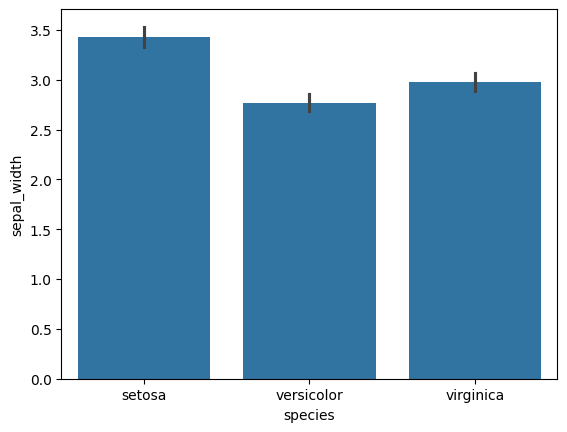

In [32]:
# seaborn does not need to make mean groups

sns.barplot(df, x="species", y="sepal_width")

In [35]:
# Box plot

fig4 = px.box(df, x='species', y='sepal_width', color='species')
fig4.show()

# save the plot
fig4.write_image("./output/fig4.png", scale=3)

In [38]:
# voilon plot

fig5 = px.violin(df, x='species', y='sepal_width', color='species', box=True)
fig5.show()

# save the plot
fig5.write_image('./output/fig5.png', scale=3)

In [50]:
#6 histogram 

fig6 = px.histogram(df, x='sepal_width', color='species')
fig6.show()
# save the plot
fig6.write_image('./output/fig6.png', scale=3)

In [44]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [49]:
#7 pie chart
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()
# save the plot
fig7.write_image("./output/fig7.png", scale=3)

In [55]:
# 8 scatter 3d plot

fig8 = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width', color='species')
fig8.show()
# save the plot
fig8.write_html("./output/fig8.html")

In [60]:
# area chart
df_area = df.sort_values(by=['sepal_length'])

fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()
# save the plot
fig9.write_image("./output/fig9.png", scale=3)

In [63]:
# bubble chart
fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show() 

In [66]:
# sunburst chart 
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()